In [1]:
%pylab inline
import lib
lib.cmdstan_path('~/cmdstan-2.17.0');

Populating the interactive namespace from numpy and matplotlib


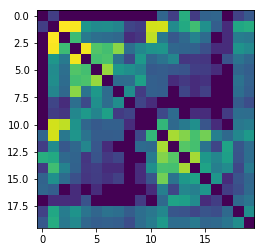

In [2]:
w = np.loadtxt('trec.d/weights.txt')
n = 20
w = w[-n:, -n:]
np.fill_diagonal(w, 0)
w /= w.max()
imshow(w**0.2)

In [3]:
ei = w.sum(axis=0)
ei /= ei.max()
ei

array([ 0.02829672,  1.        ,  0.46665432,  0.74724602,  0.36267152,
        0.23954777,  0.22894254,  0.12908265,  0.01939863,  0.04083457,
        0.39024351,  0.59365941,  0.26231238,  0.35261386,  0.29623784,
        0.12902628,  0.02626747,  0.04246924,  0.05761612,  0.06882529])

In [4]:
data = {
     "n": n,
     "ns": 50,
     "T": 10.0,
     "w": w**0.5,
     "ei": ei
}
lib.rdump('vep-ode-ei.R', data)

Compile and check it runs on test data set

In [5]:
lib.compile_model('vep-ode-ei.stan')
#!./vep-ode-ei optimize data file=vep-ode-ei.R output refresh=1

make: `/Users/maedoc/Sources/TVB/VEP/vep-ode-ei' is up to date.


In [17]:
!for i in 1 2 ; do ./vep-ode-ei id=$i sample save_warmup=1 num_warmup=200 num_samples=200 data file=vep-ode-ei.R output refresh=1 file=vep-ode-ei.sample.$i.csv &> vep-ode-ei.sample.$i.out; done

^C


In [7]:
csv = lib.parse_csv('vep-ode-ei.sample.csv')
globals().update(csv)
xze = xze.reshape((4, 3, -1, data['ns']))
csv.keys()

dict_keys(['lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__', 'ic_xz', 'x0_', 'k_', 'k', 'x0', 'xz0', 'eih', 'xze'])

(array([  1.,   2.,   3.,   0.,   0.,   4.,   2.,   2.,   3.,   1.,   5.,
         12.,  18.,  13.,   4.,   4.,   4.,   7.,   9.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   5.]),
 array([ 0.00049212,  0.0004923 ,  0.00049249,  0.00049268,  0.00049287,
         0.00049306,  0.00049325,  0.00049344,  0.00049363,  0.00049381,
         0.000494  ,  0.00049419,  0.00049438,  0.00049457,  0.00049476,
         0.00049495,  0.00049514,  0.00049533,  0.00049551,  0.0004957 ,
         0.00049589,  0.00049608,  0.00049627,  0.00049646,  0.00049665,
         0.00049684,  0.00049702,  0.00049721,  0.0004974 ,  0.00049759,
         0.00049778]),
 <a list of 30 Patch objects>)

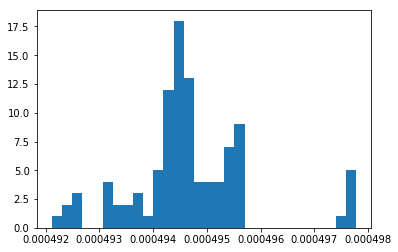

In [15]:
hist(k, 30)

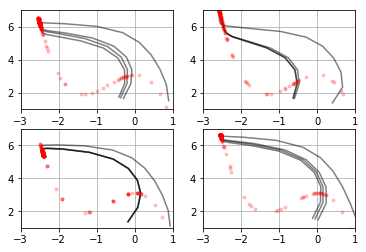

In [12]:
for i in range(4):
    subplot(2, 2, i + 1)
    x, z = transpose(xze[:, :2, i], (1, 0, 2))
    plot(x.T, z.T, 'k', alpha=0.5)
    x_ = x.flat[:]
    plot(x, 3.1 - x * x * x - 2 * x * x, 'r.', alpha=0.2)
    axis([-3, 1.0, 1, 7])
    grid(1)